# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.139326e+01     1.276457e+01
 * time: 0.004817008972167969
     1     6.411259e+01     9.539753e+00
 * time: 0.014723777770996094
     2     5.732209e+01     1.242677e+01
 * time: 0.03921198844909668
     3     4.100369e+01     8.676657e+00
 * time: 0.07387399673461914
     4     2.914020e+01     7.933595e+00
 * time: 0.1065969467163086
     5     1.955487e+01     4.656320e+00
 * time: 0.13461995124816895
     6     1.320840e+01     4.232888e+00
 * time: 0.15814495086669922
     7     9.810773e+00     6.143972e+00
 * time: 0.1782999038696289
     8     8.640289e+00     2.161862e+00
 * time: 0.2688448429107666
     9     8.482711e+00     5.684910e+00
 * time: 0.2869439125061035
    10     7.820350e+00     4.051100e+00
 * time: 0.3053138256072998
    11     6.892427e+00     3.047571e+00
 * time: 0.32391786575317383
    12     6.492569e+00     2.048197e+00
 * time: 0.34351277351379395
    13     6.227273e+00     2.701521e+00
 * time: 0.

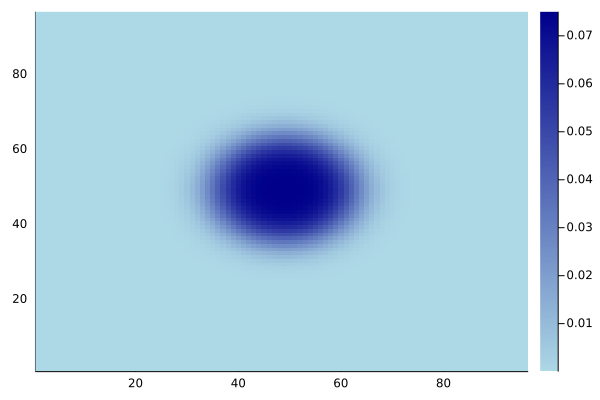

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))